In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import xarray as xr
import numpy as np
import cftime
import matplotlib.pyplot as plt
import jsmetrics
import pandas as pd
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=10)
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [6]:
#Histórico
uahist="ua_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_195001-201412.nc"
vahist='va_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_195001-201412.nc'
uahisto=xr.open_dataset(uahist)
vahisto=xr.open_dataset(vahist)
#Checanod las unidades de la presión
ua=uahisto["ua"]
# va=vahisto["va"]

In [101]:
#ERA5
uasim="ua_Amon_HadGEM3-GC31-LL_ssp585_r1i1p1f3_gn_205001-210012.nc"
vasim='va_Amon_HadGEM3-GC31-LL_ssp585_r1i1p1f3_gn_205001-210012.nc'
uas=xr.open_dataset(uasim)
vas=xr.open_dataset(vasim)
#Checanod las unidades de la presión
uasi=uas["ua"]
vasi=vas["va"]

In [102]:
#Dado que las unidades de la presión se encuentran en Pa, estas se pasarán a hPa
ua["plev"]=ua["plev"]/100
va["plev"]=va["plev"]/100

In [103]:
#Dado que las unidades de la presión se encuentran en Pa, estas se pasarán a hPa
uasi["plev"]=uasi["plev"]/100
vasi["plev"]=vasi["plev"]/100

In [104]:
#Cambiando las unidades
ua['units']='hPa'
va['units']='hPa'

In [105]:
#Cambiando las unidades
uasi['units']='hPa'
vasi['units']='hPa'

In [106]:
ua=ua.sel(lat=slice(10, 40))
          #,lon=slice(231.08,293.13))
va=va.sel(lat=slice(10,40))

In [107]:
uasi=uasi.sel(lat=slice(10, 40))
          #,lon=slice(231.08,293.13))
vasi=vasi.sel(lat=slice(10,40))

In [108]:
ua=ua.where((ua.time.dt.month==12)| (ua.time.dt.month==1)| (ua.time.dt.month==2),drop=True)
va=va.where((va.time.dt.month==12)| (va.time.dt.month==1)| (va.time.dt.month==2),drop=True)

In [109]:
uasi=uasi.where((uasi.time.dt.month==12)| (uasi.time.dt.month==1)| (uasi.time.dt.month==2),drop=True)
vasi=vasi.where((vasi.time.dt.month==12)| (vasi.time.dt.month==1)| (vasi.time.dt.month==2),drop=True)

In [110]:
ua=ua.where(ua.time.dt.year>1978 ,drop=True)
va=va.where(va.time.dt.year>1978 ,drop=True)

In [111]:
uasi=uasi.where(uasi.time.dt.year>2069 ,drop=True)
vasi=vasi.where(vasi.time.dt.year>2069 ,drop=True)

In [112]:
#Definimos la posición del STJ como la latitud del valor máximo encontrado en el campo de diferencia entre el viento zonalde la
#troposfera superior (250 hPa) y el viento zonal de la troposfera inferior (850 hPa)promediado en una banda de longitud dada entre 10° y 40°N.


#Seleccionando los datos de tropósfera superior e inferior ts es la trofosfera superior y ti la infertior
ts=ua.where(ua["plev"]==250,drop=True).mean("time")
ts1=va.where(va["plev"]==250,drop=True).mean("time")
ti=ua.where(ua["plev"]==850,drop=True).mean("time")
ti1=va.where(va["plev"]==850,drop=True).mean("time")

ts=ts.where((ts["lat"]>9) &(ts["lat"]<41))
ts1=ts1.where((ts1["lat"]>9) &(ts1["lat"]<41))
ti=ti.where((ti["lat"]>9) &(ti["lat"]<41))
ti1=ti1.where((ti1["lat"]>9) &(ti1["lat"]<41))

In [113]:
#magnitud de vector con componentes u,v
zonal250= np.sqrt(ts**2 + ts1**2)
zonal850= np.sqrt(ti**2 + ti1**2)

In [114]:
#Definimos la posición del STJ como la latitud del valor máximo encontrado en el campo de diferencia entre el viento zonalde la
#troposfera superior (250 hPa) y el viento zonal de la troposfera inferior (850 hPa)promediado en una banda de longitud dada entre 10° y 40°N.

#Seleccionando los datos de tropósfera superiod e inferior
tsi=uasi.where(uasi["plev"]==250,drop=True).mean("time")
tsi1=vasi.where(vasi["plev"]==250,drop=True).mean("time")
tisi=uasi.where(uasi["plev"]==850,drop=True).mean("time")
tisi1=vasi.where(vasi["plev"]==850,drop=True).mean("time")
tsi=tsi.where((tsi["lat"]>9) &(tsi["lat"]<41))
tsi1=tsi1.where((tsi1["lat"]>9) &(tsi1["lat"]<41))
tisi=tisi.where((tisi["lat"]>9) &(tisi["lat"]<41))
tisi1=tisi1.where((tisi1["lat"]>9) &(tisi1["lat"]<41))

In [115]:
#magnitud de vector con componentes u,v
zonals250= np.sqrt(tsi**2 + tsi1**2)
zonals850= np.sqrt(tisi**2 + tisi1**2)

In [116]:
#Promediandolo por la banda de longitud dada entre 10° y 40°N.
zonal250=zonal250.mean("lat")
zonal850=zonal850.mean("lat")

zonals250=zonals250.mean("lat")
zonals850=zonals850.mean("lat")

In [123]:
#Encontrando la varianza de la posición
h=zonal250[0]-zonal850[0]
varh=np.var(h)
s=zonals250[0]-zonals850[0]
vars=np.var(s)

In [140]:
print(varh.round(2),vars.round(2))

<xarray.DataArray ()> Size: 8B
array(15.56)
Coordinates:
    units    <U3 12B 'hPa' <xarray.DataArray ()> Size: 8B
array(12.43)
Coordinates:
    units    <U3 12B 'hPa'


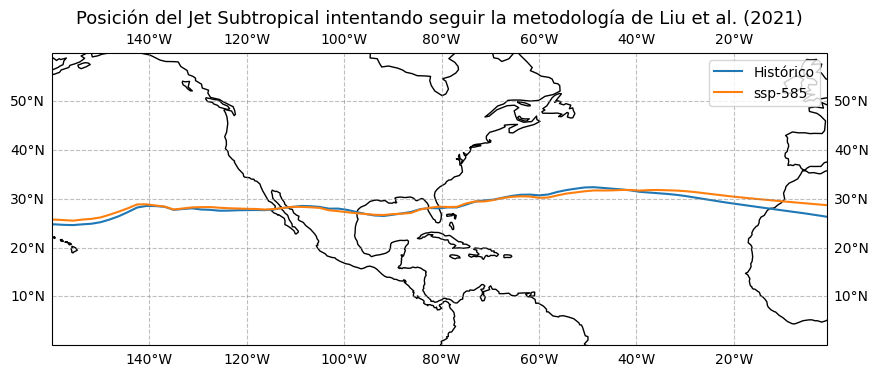

In [138]:
fig = plt.figure(figsize=(10, 10))
# hacemos objeto de mapa
ax = plt.axes(projection=ccrs.PlateCarree())
# agregamos lineas costeras
ax.coastlines()
ax.plot(h.lon-180,h, label="Histórico")
#ax.fill_between(a.lon-180, bp2, bp1, alpha=0.4,color="black")
ax.plot(s.lon-180,s, label="ssp-585")
#ax.fill_between(s.lon-180, s, s-, alpha=0.4,color="red")
ax.set_extent([200,359.1, 0, 60], crs=ccrs.PlateCarree())
ax.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
ax.right_labels = True
ax.xlabel_style = {'size': 13}
ax.ylabel_style = {'size': 13}
plt.title("Posición del Jet Subtropical intentando seguir la metodología de Liu et al. (2021)",fontsize=13)
plt.legend()
#plt.savefig("Otrometodo.png",dpi=300, bbox_inches='tight')